In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')



In [12]:
df = sns.load_dataset('iris') ## Use Iris Dataset
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [13]:
## Target Variale is 'species' and rest are Predictor variable

In [14]:
## Find the unique values

df.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [16]:
## 3 unique values lets convert them using Label Encoder

from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df.species = lb.fit_transform(df.species)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [17]:
df.species.value_counts()

0    50
1    50
2    50
Name: species, dtype: int64

In [18]:
## To make it simple lets make it a binary classfication, so we will remove the 0 class of target variable
## On we will take sepal_width and petal_length as preditor varibales

df_new = df[df.species!=0][['sepal_width','petal_length','species']]
df_new.head()

,sepal_width,petal_length,species
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1


In [21]:
df_new.shape # Shape of New Dataset

(100, 3)

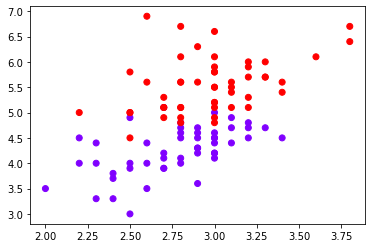

In [22]:
## Plot the datapoint since its has been reduced to 2D

plt.scatter(df_new.sepal_width, df_new.petal_length, c= df_new.species, cmap = 'rainbow')

In [23]:
## So these are our data points

In [24]:
df_new.head(70)

,sepal_width,petal_length,species
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1
...,...,...,...
115,3.2,5.3,2
116,3.0,5.5,2
117,3.8,6.7,2
118,2.6,6.9,2


In [25]:
## Now here is we observe we have first 50 rows for class '1' and next 50 are for class '2' so lets shuffle
## the data set 

df1 = df_new.sample(100)
df1.reset_index(drop=True, inplace=True) ## Resetting the index

In [26]:
df1

,sepal_width,petal_length,species
0,3.1,5.6,2
1,3.2,5.7,2
2,3.0,4.1,1
3,3.1,5.5,2
4,2.3,3.3,1
...,...,...,...
95,3.0,4.6,1
96,2.7,3.9,1
97,3.0,5.5,2
98,2.0,3.5,1


In [71]:
## Now we will dviide this data into 3 sets

## For better understandly purpose we will work on small data. 

df_train = df1.iloc[:60,:].sample(10) ## Select 10 rows randomly from 0 to 59 ## Training Data

df_val = df1.iloc[60:80,:].sample(5) ## Select 5 rows randomly from 60 to 79 ## Validation Data

df_test = df1.iloc[80:100,:].sample(5) ## Select 5 rows randomly from 80 to 99 ## Testing Data

In [72]:
df_train

,sepal_width,petal_length,species
32,2.7,3.9,1
33,3.2,4.8,1
36,2.9,4.6,1
46,3.0,4.5,1
5,2.8,4.0,1
4,2.3,3.3,1
8,3.3,4.7,1
10,3.8,6.4,2
43,2.2,5.0,2
51,3.1,4.7,1


In [73]:
df_val

,sepal_width,petal_length,species
60,2.9,4.7,1
72,2.8,6.7,2
67,2.7,5.1,1
62,2.9,5.6,2
76,3.2,5.1,2


In [75]:
df_test

,sepal_width,petal_length,species
84,3.1,5.4,2
86,3.1,4.9,1
98,2.0,3.5,1
80,3.0,5.9,2
96,2.7,3.9,1


In [76]:
x_test = df_val.iloc[:, 0:2].values
y_test = df_val.iloc[:,-1].values

In [77]:
x_test

array([[2.9, 4.7],
       [2.8, 6.7],
       [2.7, 5.1],
       [2.9, 5.6],
       [3.2, 5.1]])

In [78]:
y_test

array([1, 2, 1, 2, 2])

## Case1 Bagging

In [94]:
## So We have training data of 10 rows i.e df_train and we are going to train 3 DT models and we will pass 80% of
## data to each model

## Data for Tree1

df_bag = df_train.sample(frac=0.8, replace=True) ## Replace means its Random Sampling with Replacement
                                                ## That means one row can occur multiple times

x = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

df_bag

,sepal_width,petal_length,species
5,2.8,4.0,1
5,2.8,4.0,1
32,2.7,3.9,1
33,3.2,4.8,1
51,3.1,4.7,1
4,2.3,3.3,1
36,2.9,4.6,1
36,2.9,4.6,1


In [95]:
## 5th and 36th row are getting repeated as we are doing random sampling with replcement.

In [96]:
from sklearn.tree import DecisionTreeClassifier , plot_tree
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions

def evaluate(clf, x,y): ## Creating a function to evaluate the model building and performance
    clf.fit(x,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(x.values,y.values,clf=clf, legend =2)
    y_pred = clf.predict(x_test)
    print('Accuracy Score : ',accuracy_score(y_test, y_pred))

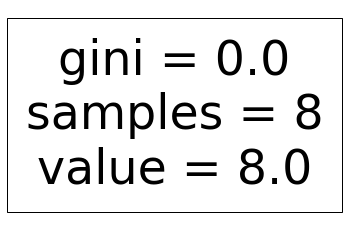

Accuracy Score :  0.4


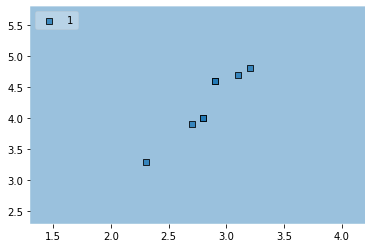

In [97]:
dt_bag1 = DecisionTreeClassifier()
evaluate(dt_bag1, x, y)

In [ ]:
## Accuracy is 0.8

In [98]:
## Data for Tree2

df_bag = df_train.sample(frac=0.8, replace=True) ## Replace means its Random Sampling with Replacement
                                                ## That means one row can occur multiple times

x = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

df_bag

,sepal_width,petal_length,species
10,3.8,6.4,2
8,3.3,4.7,1
33,3.2,4.8,1
4,2.3,3.3,1
51,3.1,4.7,1
32,2.7,3.9,1
4,2.3,3.3,1
5,2.8,4.0,1


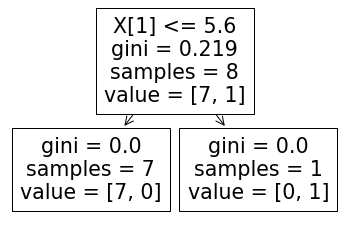

Accuracy Score :  0.6


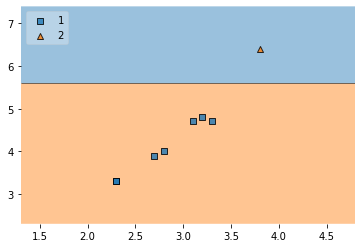

In [99]:
dt_bag2 = DecisionTreeClassifier()
evaluate(dt_bag2, x, y)

In [89]:
## Accuracy is 0.6

In [100]:
## Data for Tree3

df_bag = df_train.sample(frac=0.8, replace=True) ## Replace means its Random Sampling with Replacement
                                                ## That means one row can occur multiple times

x = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

df_bag

,sepal_width,petal_length,species
33,3.2,4.8,1
8,3.3,4.7,1
43,2.2,5.0,2
4,2.3,3.3,1
43,2.2,5.0,2
51,3.1,4.7,1
46,3.0,4.5,1
10,3.8,6.4,2


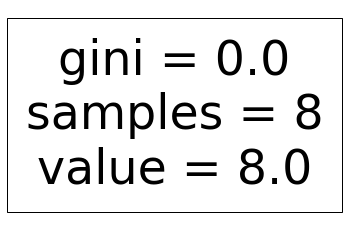

Accuracy Score :  0.4


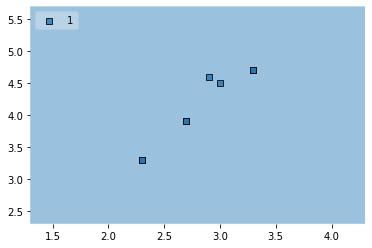

In [91]:
dt_bag3 = DecisionTreeClassifier()
evaluate(dt_bag3, x, y)

In [101]:
## Accuracy is 0.8

In [102]:
## Now this is about Bootstraping Part, Now lets switch to Aggregation part where we select the result for overall
## Bagging Model

### Predict

In [103]:
## for this we will us out 3rd dataset df_test

df_test

,sepal_width,petal_length,species
84,3.1,5.4,2
86,3.1,4.9,1
98,2.0,3.5,1
80,3.0,5.9,2
96,2.7,3.9,1


In [104]:
# Now lets feed all the models with same data point

print('Pridiction 1', dt_bag1.predict(np.array([3.0,4.2]).reshape(1,2)))
print('Pridiction 2', dt_bag2.predict(np.array([3.0,4.2]).reshape(1,2)))
print('Pridiction 3', dt_bag3.predict(np.array([3.0,4.2]).reshape(1,2)))

Pridiction 1 [1]
Pridiction 2 [1]
Pridiction 3 [1]


In [105]:
## So all are predicting correctly

## Lets try different data point

print('Pridiction 1', dt_bag1.predict(np.array([2.9,4.5]).reshape(1,2)))
print('Pridiction 2', dt_bag2.predict(np.array([2.9,4.5]).reshape(1,2)))
print('Pridiction 3', dt_bag3.predict(np.array([2.9,4.5]).reshape(1,2)))

Pridiction 1 [1]
Pridiction 2 [1]
Pridiction 3 [1]


In [70]:
## All are prediciting correctly

In [106]:
## So this is whole process of Bagging

## Pasting

In [107]:
# Pasting is similar to the bagging , the only difference its is row sampling without replacement

df_train

,sepal_width,petal_length,species
32,2.7,3.9,1
33,3.2,4.8,1
36,2.9,4.6,1
46,3.0,4.5,1
5,2.8,4.0,1
4,2.3,3.3,1
8,3.3,4.7,1
10,3.8,6.4,2
43,2.2,5.0,2
51,3.1,4.7,1


In [108]:
df_train.sample(frac=0.8)

,sepal_width,petal_length,species
43,2.2,5.0,2
33,3.2,4.8,1
51,3.1,4.7,1
4,2.3,3.3,1
10,3.8,6.4,2
5,2.8,4.0,1
46,3.0,4.5,1
36,2.9,4.6,1


In [109]:
## So here No rows are repeating

## Random Subspaces

In [113]:
## In this, we do sampling column wise, with replcaement or without replacement both

df # Original Dataset

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [115]:
df2 = df.sample(3, replace=True, axis=1) # Random Sampling Column-wise with Replacement (Any 3 columns)

df2

,petal_length,species,species
0,1.4,0,0
1,1.4,0,0
2,1.3,0,0
3,1.5,0,0
4,1.4,0,0
...,...,...,...
145,5.2,2,2
146,5.0,2,2
147,5.2,2,2
148,5.4,2,2


In [ ]:
## 2 Species columns as this is with replacement

In [119]:
df3 = df.sample(4, axis=1)# Random Sampling Column-Wise without Replacement, (Any 4 Columns)
df3

,sepal_length,petal_width,species,petal_length
0,5.1,0.2,0,1.4
1,4.9,0.2,0,1.4
2,4.7,0.2,0,1.3
3,4.6,0.2,0,1.5
4,5.0,0.2,0,1.4
...,...,...,...,...
145,6.7,2.3,2,5.2
146,6.3,1.9,2,5.0
147,6.5,2.0,2,5.2
148,6.2,2.3,2,5.4


In [120]:
# All 4 are different as its is without replacement.

## Random Patches

In [122]:
## In this technique, we use both row and column sampling with or without replcaement

df # Original Dataset

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [126]:
df4 = df.sample(frac=0.7, replace=True).sample(3, axis=1)
df4         ## Randoming Row Sampling with Replacement and Random Column Sampling without replacement.

,species,petal_length,petal_width
129,2,5.8,1.6
21,0,1.5,0.4
52,1,4.9,1.5
6,0,1.4,0.3
119,2,5.0,1.5
...,...,...,...
88,1,4.1,1.3
104,2,5.8,2.2
40,0,1.3,0.3
81,1,3.7,1.0


In [ ]:
## Df4 has any 70% rows with 3 columns from DF